# Python Challenge 

## Question: Analyzing Monthly Sales Trends

### Background:
You have been provided with two CSV files: `orders.csv` containing order information and `order_details.csv` containing details of each order. The `orders.csv` file includes columns order_id and order_date, while `order_details.csv` includes order_id, amount, and category. Your task is to analyze monthly sales trends for the "Electronics" category.

### Tasks:
- Load the data from `orders.csv` and `order_details.csv` into pandas DataFrames.
- Convert the order_date column to datetime format and set it as the index of both DataFrames.
- Subset the data to include only orders and order details related to the "Electronics" category.
- Aggregate the monthly total sales (amount) for the "Electronics" category.
- Plot a line graph to visualize the monthly sales trends for the "Electronics" category.

### Expected Output:
A line plot showing the monthly total sales trends for the "Electronics" category.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [20]:
order_details = pd.read_csv('data/order_details_clean.csv')
orders = pd.read_csv('data/orders_clean.csv')

In [21]:
order_details.dtypes

order_id         object
amount          float64
profit          float64
quantity          int64
category         object
sub-category     object
dtype: object

In [22]:
orders.dtypes

order_id          object
order_date        object
customer_name     object
state             object
city              object
month            float64
year             float64
dtype: object

In [23]:
orders.head()

,order_id,order_date,customer_name,state,city,month,year
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal,4.0,2018.0
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur,4.0,2018.0
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata,4.0,2018.0


In [24]:
order_details.head()

,order_id,amount,profit,quantity,category,sub-category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [25]:
# Convert order_date to datetime format and set as index
orders['order_date'] = pd.to_datetime(orders['order_date'], format='%Y-%m-%d')

# Join the two dataframes and set the index
electronics_orders = orders.merge(order_details, how='inner', on='order_id')
electronics_orders.set_index('order_date', inplace=True)

# Subset data for Electronics category
electronics_orders = electronics_orders[electronics_orders['category'] == 'Electronics']



In [29]:
# Aggregate monthly sales
monthly_sales = electronics_orders.resample('M')['amount'].sum()

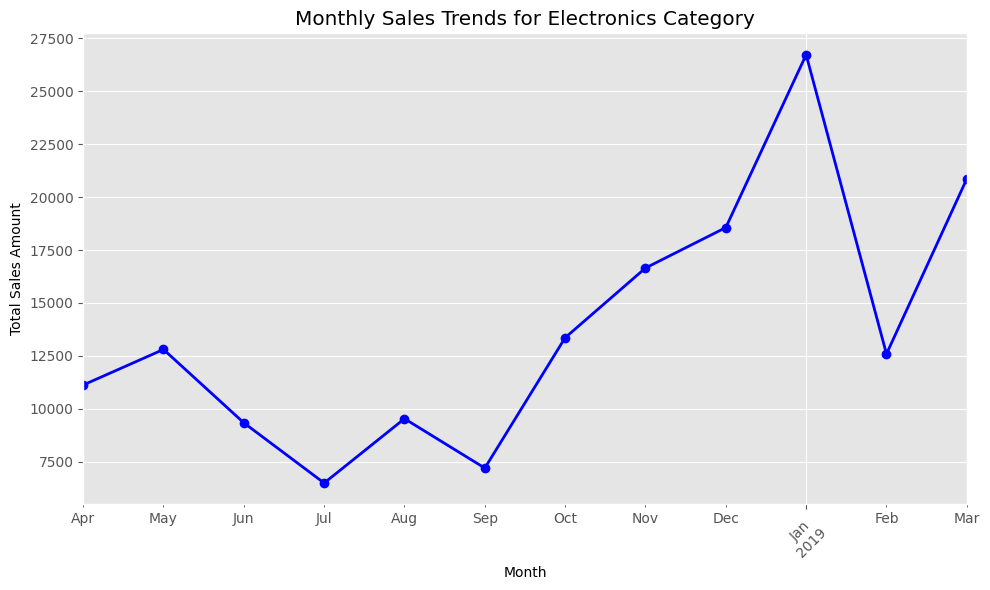

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Monthly Sales Trends for Electronics Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()